2.18.0
(1000, 2)
(1000, 1)


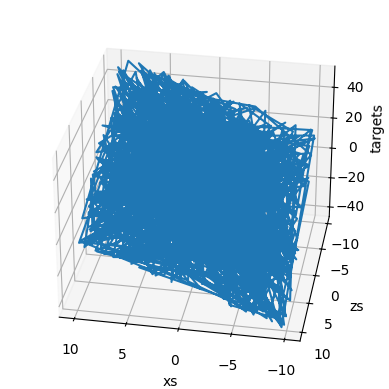

[[-0.08433541]
 [ 0.04152079]] [0.04985182]
248.6031942910849
232.25645123835181
217.0391320579968
202.87302271039877
189.68533012164215
177.40830619033912
165.9788978897253
155.3384216528837
145.43226035485765
136.2095813225668
127.62307391245402
119.62870529722187
112.185493197404
105.25529438133907
98.8026078388362
92.79439160986097
87.19989232032833
81.990486542927
77.13953316216477
72.62223597983049
68.41551585011452
64.49789168298871
60.84936970037775
57.45134037239234
54.28648250066415
51.3386739528294
48.59290858664347
46.035218934252114
43.65260424696272
41.432963528604816
39.36503321138816
37.43832915219213
35.6430926495766
33.97024020260893
32.41131675196033
30.958452161739515
29.60432071729513
28.34210342981784
27.16545295308893
26.068460931230533
25.045627608882732
24.091833546930186
23.202313297785967
22.372630904370098
21.598657096346226
20.876548065951773
20.20272571391983
19.573859263587305
18.986848148352788
18.43880608422582
17.92704624533108
17.449067465927744
17.00

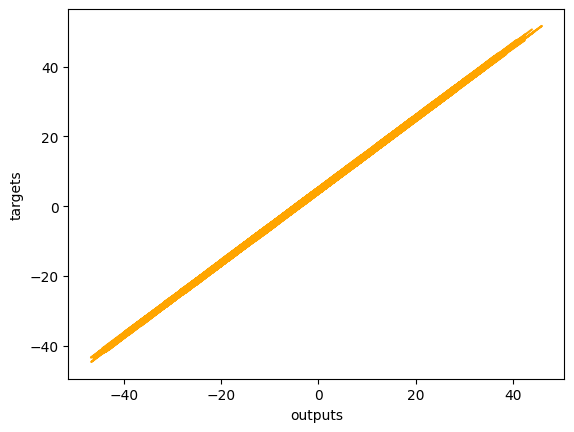

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(tf.__version__)
#%matplotlib inline


observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))
inputs = np.column_stack((xs, zs))
print(inputs.shape)


noise = np.random.uniform(low=-1, high=1, size=(observations, 1))
targets = 2 * xs - 3 * zs + 5 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)


targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()


init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

targets = targets.reshape(observations, 1)
eta = 0.001

for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)

    deltas_scaled = deltas / observations
    weights = weights - eta * np.dot(inputs.T, deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)

print(weights, biases)

plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()